In [4]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train= pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

In [6]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [260]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

1) From the above we can see that **pick up and drop off datetime is object type data**, we have to convert it to date-time type.

2) Also there are **some null values in some features**. We have to fix that in right manner.

3) **And also we have to see whether all the numerical data is actually numrical or categorical in nature.**

4) **And not to forget total_amount is going to be our label** , as we will be predicting it for our test set.

**5 Columns have exact same number of null values, which is interesting. I want to explore more on this and find out whether these are the same set of rows.**

In [261]:
train.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [262]:
null_rows= train[train['RatecodeID'].isnull()==True]
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6077 entries, 33 to 174986
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               6077 non-null   int64  
 1   tpep_pickup_datetime   6077 non-null   object 
 2   tpep_dropoff_datetime  6077 non-null   object 
 3   passenger_count        0 non-null      float64
 4   trip_distance          6077 non-null   float64
 5   RatecodeID             0 non-null      float64
 6   store_and_fwd_flag     0 non-null      object 
 7   PULocationID           6077 non-null   int64  
 8   DOLocationID           6077 non-null   int64  
 9   payment_type           6077 non-null   object 
 10  extra                  6077 non-null   float64
 11  tip_amount             6077 non-null   float64
 12  tolls_amount           6077 non-null   float64
 13  improvement_surcharge  6077 non-null   float64
 14  total_amount           6077 non-null   float64
 15  conges

***My guess was correct. Probably these rows are closely related to each other***. Maybe these feature values are not applicable for these rows at all, thats' why they are null. One thing for sure we cannot remove them as they might be meaningful.*

In [263]:
print(train['RatecodeID'].unique())
print(train['VendorID'].unique())

[ 1. 99.  3. nan  2.  5.  4.]
[1 0 2]


*After doing some research on internet*, I **found both RateCodeID and VendorID to be categorical in nature.**

1) VendorID is a code indicating the TPEP provider that provided the record. It doesn't look like an important feature for now.

2)RatecodeID is the final rate code in effect at the end of the trip. For more details I attached this pdf file https://rb.gy/nvedq4.

Now lets explore these 2 features carefully and see if it has any effect on total_amount

In [264]:
#for now imputing a random value on 'RatecodeID' to start analysing the full data.
train['RatecodeID'].fillna(6, inplace=True)
print(train['RatecodeID'].value_counts(), train['VendorID'].value_counts())

RatecodeID
1.0     158652
2.0       7314
6.0       6077
5.0       1036
99.0       748
3.0        727
4.0        446
Name: count, dtype: int64 VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64


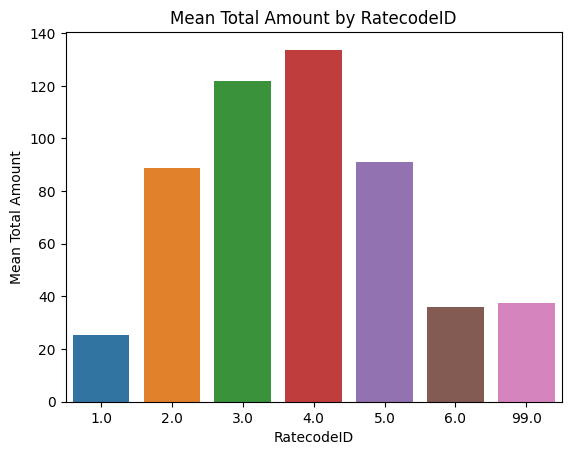

In [265]:
result = train.groupby('RatecodeID')['total_amount'].mean().reset_index()

# Using Seaborn
sns.barplot(x='RatecodeID', y='total_amount', data=result)
plt.title('Mean Total Amount by RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Mean Total Amount')
plt.show()

**Wow it looks like 'RatecodeID' could play a big role determining the total_amount, which is surprising cosidering very little information was given in the competition.**

*But, I am little bit more curious why such big difference in the mean values.*

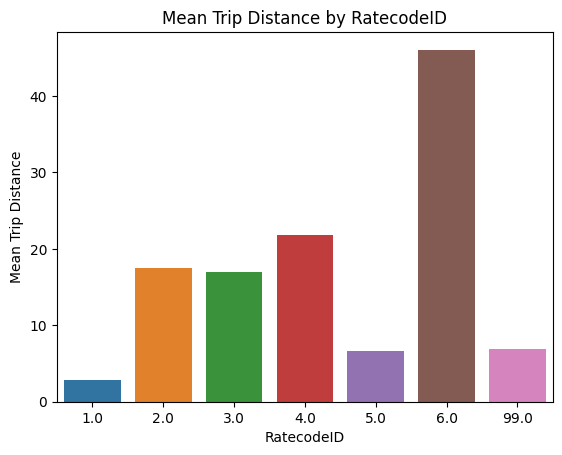

In [266]:
result_distance = train.groupby('RatecodeID')['trip_distance'].mean().reset_index()

# Using Seaborn
sns.barplot(x='RatecodeID', y='trip_distance', data=result_distance)
plt.title('Mean Trip Distance by RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Mean Trip Distance')
plt.show()

I was kind of expecting **'RatecodeID' 2,3,4 to have high distance values due to high total_amount** but, **'5' value surprises with very low mean distance but high mean total_amount.**

Similarly **value '6' has very high mean distance but relatively much lower price**.

**My hypothesis is 'Ratecodes' are vehicle types**. As we know luxurious/big cars will charge more fare even for little distances.

*Also I believe 'Ratecode'=6 (which was null initially) to be some kind of transportation vehicle ,since the mean distance 45 miles is unusually high. Therefore we will impute values accordingly for these datapoints.*

In [268]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,175000.0,0.728377,0.445606,0.000000,0.000000,1.000000,1.000000,2.000000
passenger_count,168923.0,1.357678,0.891283,0.000000,1.000000,1.000000,1.000000,9.000000
trip_distance,175000.0,5.145930,394.971052,0.000000,1.080000,1.840000,3.610000,135182.060000
RatecodeID,175000.0,1.673937,6.452945,1.000000,1.000000,1.000000,1.000000,99.000000
PULocationID,175000.0,132.710349,76.148799,1.000000,67.000000,133.000000,199.000000,264.000000
DOLocationID,175000.0,132.701429,76.192493,1.000000,67.000000,133.000000,199.000000,264.000000
extra,175000.0,1.932143,1.948497,-7.500000,0.000000,1.000000,2.500000,11.750000
tip_amount,175000.0,6.127497,4.610834,0.000079,3.473321,5.286217,7.502746,484.876151
tolls_amount,175000.0,0.646816,2.328274,-29.300000,0.000000,0.000000,0.000000,80.000000
improvement_surcharge,175000.0,0.979689,0.198775,-1.000000,1.000000,1.000000,1.000000,1.000000


Some key obsevations in the numerical data

1) I see few features that are **negative eg. extra,tolls_amount, improvement_surcharge, total_amount etc**. *We have to handle that in the right manner, other it can effect badly on our model's performance.*

2) **Also max value of trip_distance is (135182 miles or kms) which is unusually high**. *For context, the distance between 2 farthest point in USA is around 9500 kms or 5900 miles. This max value is its 15 times. We can remove such outliers for our model to generalize well. We can clearly see that for this feature, difference between mean and median is huge.*

3) **Also trip_distance, passenger_count=0** does not make sense right now. We will see what to do with it.

4) **Max passenger_count = 9** is also probably a mistake.

In [269]:
print(train[train['passenger_count']==0].shape[0])
print(train[train['trip_distance']==0].shape[0])

2818
2632


**Since there are many rows with 0 values for both of them. I decide not to remove them. Also, possible explaination for 0 values:**

**1) For passenger_count : Probably the driver travelled some distance to pickup the passenger but the trip was cancelled.**

**2) For trip_distance : Maybe the trip was booked at 1st but afterwards it was cancelled.**

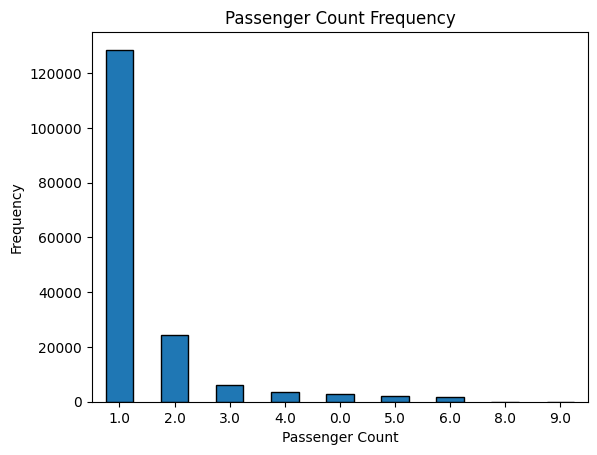

In [271]:
#Lets see the distribution of passenger_count
train['passenger_count'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Passenger Count Frequency')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

**This bar chart was kind of expected. Lets see if the outliers need to be removed.**

In [272]:
train[train['passenger_count']>6]['total_amount'].mean()

101.73333333333333

**Since the amounts are high for passenger_count>6 I won't remove them.**

In [273]:
train[train['passenger_count']>6]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
12171,1,2023-06-30 12:39:44,2023-06-30 12:03:47,8.0,0.01,5.0,N,53,198,Credit Card,0.0,21.645809,0.0,1.0,100.2,0.0,0.0
81012,1,2023-06-29 01:53:13,2023-06-29 01:12:24,8.0,0.01,5.0,N,62,227,Credit Card,0.0,1.571964,0.0,1.0,91.0,2.5,0.0
97896,1,2023-06-28 23:15:20,2023-06-29 00:42:40,9.0,18.47,5.0,N,60,116,Credit Card,0.0,20.768474,0.0,1.0,114.0,2.5,0.0


*Only 3 rows more than 6 passenger_counts which co-incidentally happens to have RatecodeID=5.
From this we can quickly draw a conclusion that these are some big vehicles. That is why it was so costly*

### Imputing NAN Values

**Remember these are (ratecode =6) rows, means passenger_count not applicable**. For Airport_fee and congestion_surcharge I am filling 0.

In [274]:
#Imputing nan values for passenger count. Remember these are ratecode =6 rows. 

#Means passenger_count not applicable, as it is a transport-vehicle.Therefore, 
#I am going to impute -1. Since we have found,
#that there are many rows with 0 values. I don't want these rows to get mixed up.


def fill_missing_values(df):
    # Fill missing values for 'RatecodeID' with 6 as it is unique to the values present.
    df['RatecodeID'].fillna(6, inplace=True)

    # Fill missing values for 'passenger_count' with -1
    df['passenger_count'].fillna(-1, inplace=True)

    # Fill missing values for 'Airport_fee' and 'congestion_surcharge' with 0
    df['Airport_fee'].fillna(0, inplace=True)
    df['congestion_surcharge'].fillna(0, inplace=True)

    return df

In [275]:
train= fill_missing_values(train)

In [276]:
train.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   VendorID               175000 non-null  bool 
 1   tpep_pickup_datetime   175000 non-null  bool 
 2   tpep_dropoff_datetime  175000 non-null  bool 
 3   passenger_count        175000 non-null  bool 
 4   trip_distance          175000 non-null  bool 
 5   RatecodeID             175000 non-null  bool 
 6   store_and_fwd_flag     175000 non-null  bool 
 7   PULocationID           175000 non-null  bool 
 8   DOLocationID           175000 non-null  bool 
 9   payment_type           175000 non-null  bool 
 10  extra                  175000 non-null  bool 
 11  tip_amount             175000 non-null  bool 
 12  tolls_amount           175000 non-null  bool 
 13  improvement_surcharge  175000 non-null  bool 
 14  total_amount           175000 non-null  bool 
 15  congestion_surcha

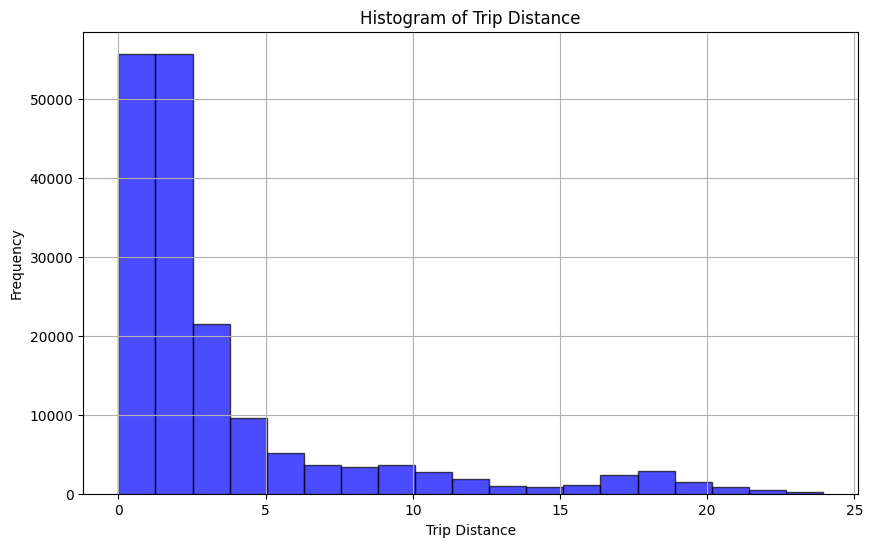

In [277]:
max_trip_distance = train['trip_distance'].quantile(0.995)
filtered_train = train[train['trip_distance'] < max_trip_distance]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_train['trip_distance'], bins=19, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**People mostly us taxis for in the range of 0-5 Kms.**

In [278]:
train[train['trip_distance']>10000]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
70458,1,2023-06-30 23:03:21,2023-07-01 00:16:10,-1.0,20314.00,6.0,NaN,249,84,Wallet,0.0,9.657420,0.0,1.0,42.56,0.0,0.0
85525,1,2023-06-29 05:23:56,2023-06-29 04:33:47,-1.0,135182.06,6.0,NaN,133,80,Wallet,0.0,5.948871,0.0,1.0,27.92,0.0,0.0
107988,1,2023-06-29 03:32:14,2023-06-29 04:57:15,-1.0,92292.43,6.0,NaN,55,71,Wallet,0.0,4.262185,0.0,1.0,18.00,0.0,0.0


**Removing distance values above 10,000 which is insanely high. They also have very little total_amount comparatively**

In [279]:
train=train[train['trip_distance']<10000]

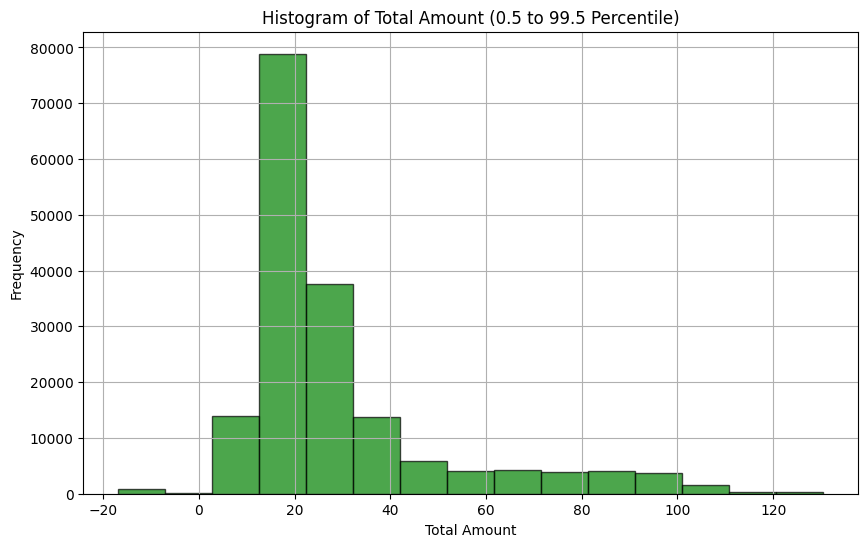

In [280]:
min_total_amount = train['total_amount'].quantile(0.005)
max_total_amount = train['total_amount'].quantile(0.995)

filtered_train_total_amount = train[(train['total_amount'] >= min_total_amount) & (train['total_amount'] <= max_total_amount)]

# Plotting the histogram for total_amount
plt.figure(figsize=(10, 6))
plt.hist(filtered_train_total_amount['total_amount'], bins=15, range=(min_total_amount, max_total_amount), color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Total Amount (0.5 to 99.5 Percentile)')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Most Taxi fares are in the range 0 to 40 USD**, which matches our analysis on trip_distance.

In [281]:
#Looking for the number of rows with negative total_amounts
train[train['total_amount']<0].shape[0]

1725

**Examining the nature of the data points that have negative values**

In [282]:
train[train['total_amount']<0].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
91,1,2023-06-28 16:16:21,2023-06-28 18:23:07,1.0,18.58,2.0,N,106,231,Cash,-5.0,3.054085,-6.55,-1.0,-87.3,-2.5,-1.75
166,1,2023-06-30 16:47:30,2023-06-30 15:52:30,2.0,2.23,1.0,N,187,261,Cash,-2.5,0.629374,0.00,-1.0,-22.8,-2.5,0.00
228,1,2023-06-30 21:26:16,2023-06-30 20:19:42,1.0,1.95,1.0,N,115,84,Cash,-1.0,0.324590,0.00,-1.0,-18.5,-2.5,0.00
316,1,2023-06-28 23:32:35,2023-06-28 23:52:35,1.0,1.01,1.0,N,160,135,unknown,-1.0,3.772281,0.00,-1.0,-9.7,0.0,0.00
370,1,2023-06-29 07:50:57,2023-06-29 08:36:46,1.0,0.01,1.0,N,131,248,UPI,0.0,3.148100,0.00,-1.0,-7.0,-2.5,0.00


**We can see "total_amount" is negative when either of ['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge','Airport_fee] is negative.**

**Therefore, removing negative rows or making them postive is not a good idea, since we might have negative values in our test data as well. We will keep it as it is.**

**Looks like mostly small transactions are done using UPI**. 

*In India we also mostly use UPI too frequently nowadays for small transactions.*

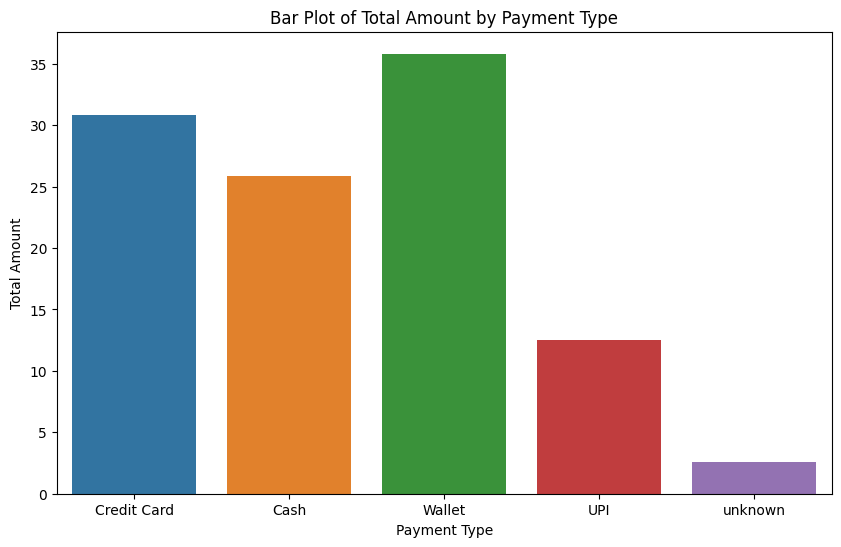

In [283]:
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='total_amount', data=train, errorbar=None)
plt.title('Bar Plot of Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.show()

**Looks like people are much more generous while paying using Credit Cards and Wallet and not so much while using UPI or Cash.**

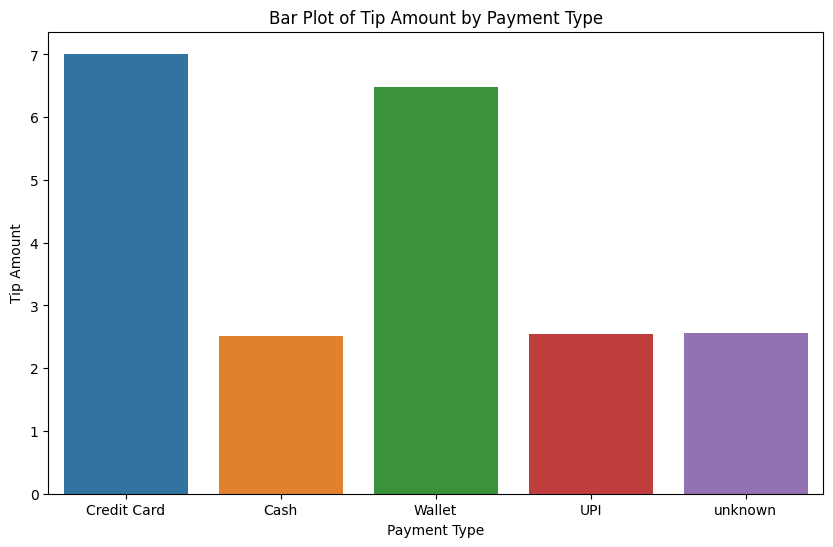

In [284]:
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='tip_amount', data=train, errorbar=None)
plt.title('Bar Plot of Tip Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Tip Amount')
plt.show()

Converting object type data to datetime to extract more features and **found pickup time to be
greater than drop off time for many rows. Therefore, decided to swap them**

In [285]:
train['tpep_pickup_datetime'] = pd.to_datetime(train['tpep_pickup_datetime'])
train['tpep_dropoff_datetime']=pd.to_datetime(train['tpep_dropoff_datetime'])
train[train['tpep_pickup_datetime']>train['tpep_dropoff_datetime']].shape[0]

65673

**Swapped values between pickup and dropoff time wherever pickup time > dropoff time. It is not possible to remove  so many rows**

In [286]:
def preprocess_datetime_columns(df):
    # Convert to datetime
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

    # Handle cases where pickup datetime is greater than dropoff datetime
    mask = df['tpep_pickup_datetime'] > df['tpep_dropoff_datetime']
    df['temp'] = df['tpep_pickup_datetime']
    df.loc[mask, 'tpep_pickup_datetime'] = df.loc[mask, 'tpep_dropoff_datetime']
    df.loc[mask, 'tpep_dropoff_datetime'] = df.loc[mask, 'temp']

    # Drop the temporary column
    df.drop(columns=['temp'], inplace=True)

    # Extract day of the week
    df['day'] = df['tpep_pickup_datetime'].dt.day_name()

    # Calculate duration in minutes
    df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

    # Extract hour and minute of the day when the passenger was picked up
    df['hour'] = df['tpep_pickup_datetime'].dt.hour
    df['minute'] = df['tpep_pickup_datetime'].dt.minute

    # Calculate time in hours
    df['time'] = df['hour'] + df['minute'] / 60

    return df

**Extracted 3 new features from time-stamps **
>**duration of the journey,** 

> **time of the journey in hours and minutes**

> **on which day of the week**,   the journey happened which would add value to our model training.

In [293]:
train= preprocess_datetime_columns(train)

In [294]:
train['day'].value_counts()

day
Thursday     73778
Friday       65751
Wednesday    35110
Saturday       358
Name: count, dtype: int64

**Lets see if Taxi fares differs by different week days**

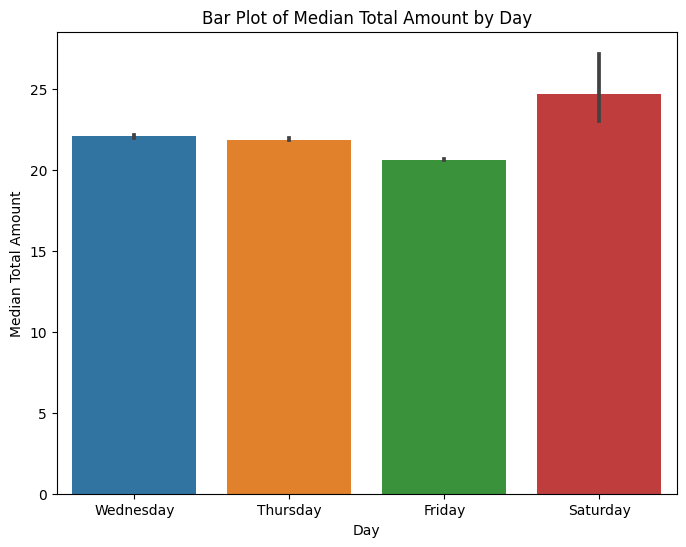

In [297]:
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='total_amount', data=train, estimator='median', order=['Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Bar Plot of Median Total Amount by Day')
plt.xlabel('Day')
plt.ylabel('Median Total Amount')
plt.show()

**Total Amount is slightly higher in the weekend. Although we have a small sample size.**

**Lets explore the busiest and quietest time of the day.**

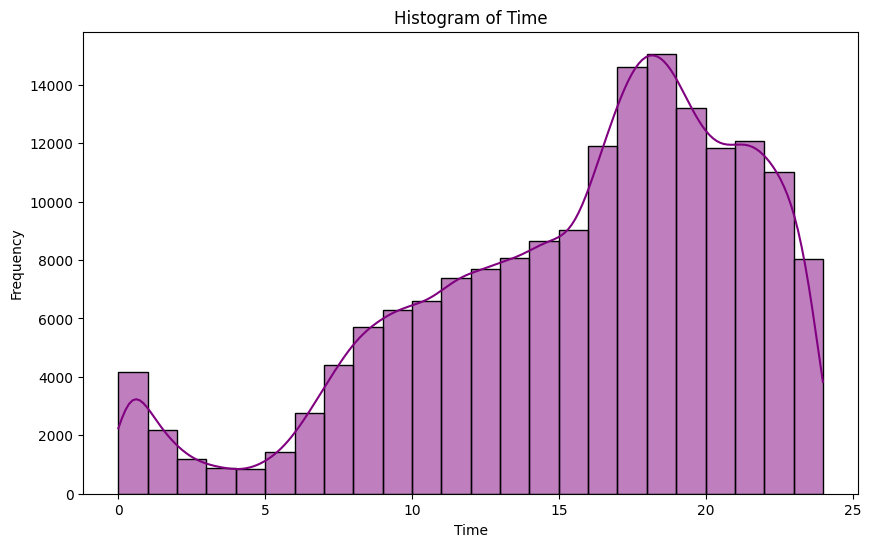

In [298]:
plt.figure(figsize=(10,6))
sns.histplot(train['time'], bins=24, kde=True, color='purple', edgecolor='black')
plt.title('Histogram of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

**12 am to 7 am looks the quietest, while 4 pm to 8 pm looks like heavy traffic, which was expected.**

In [299]:
train['duration'].describe()

count    174997.000000
mean         44.569672
std          47.014983
min           0.000000
25%          17.800000
50%          37.933333
75%          64.250000
max        1537.150000
Name: duration, dtype: float64

**Treatment of categorical variables**

In [300]:
def handle_categorical(df, mappings=None, one_hot_cols=None):
    if mappings:
        df.replace(mappings, inplace=True)

    if one_hot_cols:
        df = pd.get_dummies(df, columns=one_hot_cols)

        return df

In [301]:
mapping = {'Friday': 0, 'Thursday': 1, 'Wednesday': 2, 'Saturday': 6}
cat_columns = ['RatecodeID', 'payment_type']

train = handle_categorical(train, mappings={'day': mapping}, one_hot_cols=cat_columns)

**Saturday mapped to 6 as on the weekend prices are higher than usual. I wanted to distance its value 
from normal days's value.**

*Dropping store_and_fwd_flag as this feature indicates whether the data was stored in the taxi meter digitally.* 

In [302]:
train.drop(['tpep_pickup_datetime','tpep_dropoff_datetime', 'store_and_fwd_flag', 'hour', 'minute'], axis=1, inplace= True)

In [303]:
train.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'PULocationID',
       'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'day', 'duration', 'time', 'RatecodeID_1.0',
       'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0',
       'RatecodeID_6.0', 'RatecodeID_99.0', 'payment_type_Cash',
       'payment_type_Credit Card', 'payment_type_UPI', 'payment_type_Wallet',
       'payment_type_unknown'],
      dtype='object')

Seperating our target label and features

In [304]:
label= train['total_amount']
train= train.drop('total_amount', axis=1)

In [305]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=  train_test_split(train, label, random_state= 1)

In [306]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor,BaggingRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV,cross_val_score

In [307]:
lg= LinearRegression()
lg.fit(x_train,y_train)
print('train_score :' ,r2_score((y_train), (lg.predict(x_train))))
print('test_score :', r2_score((y_test), (lg.predict(x_test))))

train_score : 0.7777902624143128
test_score : 0.7598508079714494


**I decided to use tree based algorithms only, which is why I did not use feature scaling as decision trees don't require any scaling.** 

**Reason for focusing on tree based algorithms as this dataset has high multicollinearity(like tip_amount and payment_type)  as well 
as features like 'LocationIDs' and 'time' can be captured by tree based algorithms much better.**

In [308]:
rd= RandomForestRegressor(random_state=1,n_jobs=-1)
rd.fit(x_train,y_train)
print('train_score :' ,r2_score((y_train), (rd.predict(x_train))))
print('test_score :', r2_score((y_test), (rd.predict(x_test))))

train_score : 0.991654748037915
test_score : 0.9480724421395494


In [309]:
gd=GradientBoostingRegressor(random_state=1)
gd.fit(x_train,y_train)
print('train_score :' ,r2_score((y_train), (gd.predict(x_train))))
print('test_score :', r2_score((y_test), (gd.predict(x_test))))

train_score : 0.9458868551276972
test_score : 0.9330022306230604


In [310]:
 et=ExtraTreesRegressor(random_state=1, n_jobs=-1)
 et.fit(x_train,y_train)
 print('train_score :' ,r2_score((y_train), (et.predict(x_train))))
 print('test_score :', r2_score((y_test), (et.predict(x_test))))

train_score : 1.0
test_score : 0.9490674047457788


**Xgboost gives the best results, I want to check whether it is the case after using cross-validation**

In [311]:
xg= xgb.XGBRegressor(random_state=1)
xg.fit(x_train,y_train)
print('train_score :' ,r2_score((y_train), (xg.predict(x_train))))
print('test_score :', r2_score((y_test), (xg.predict(x_test))))

train_score : 0.9796584590842347
test_score : 0.9506946318253504


**ExtraTrees uses bagging technique just like random forest.**

**Difference between Extra Trees and Random Forests**

Random Forests build multiple decision trees over bootstrapped subsets of the data, whereas Extra Trees build multiple decision trees over the entire dataset. In addition, Random Forest chooses the best node to split on while Extra Trees randomizes the node split.

**In practice, extra trees is faster as it does not spend time on finding the optimal split.
It works well on noisy datasets better than random forests.**

**Now I want to check my cross validation score on my 3 best models which are Extra Trees, Random Forest and XGBoost**

In [312]:
cv=KFold(n_splits=5, shuffle=True, random_state=1)


score= cross_val_score(rd, train, label, scoring='r2', n_jobs=-1, cv=cv)
print('RandomForest :', score, score.mean())
score=cross_val_score(et, train, label, scoring='r2', n_jobs=-1, cv=cv)
print('ExtraTrees :', score, score.mean())
score=cross_val_score(xg, train, label, scoring='r2', n_jobs=-1, cv=cv)
print('xgboost :',score, score.mean())

RandomForest : [0.9494281  0.9408852  0.93372334 0.95378152 0.92792465] 0.9411485617037035
ExtraTrees : [0.95119273 0.94158865 0.94340455 0.95596631 0.95281181] 0.9489928105578793
xgboost : [0.94833557 0.94708854 0.93976422 0.95592648 0.92632575] 0.9434881128519494


**From the above results looks like ExtraTreesRegressor is the correct model to choose.**

**Xgboost performs well only for certain subset of the dataset. 
We clearly see how in the last fold ,xgboost aswell as Random Forest underperforms.**

**Deficiences of extratrees? I want to know how it is performing for different RatecodeIDs/ vehicle-types**

In [313]:
y_pred_et= pd.Series(et.predict(x_test), name='y_pred_et',index=x_test.index)
new= pd.concat([x_test,y_test,y_pred_et], axis=1)
col=['RatecodeID_1.0',
       'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0',
       'RatecodeID_6.0', 'RatecodeID_99.0']
for i in col:
    subset = new[new[i] == True]
    print(i,r2_score(subset['total_amount'], subset['y_pred_et']))

RatecodeID_1.0 0.950640741052937
RatecodeID_2.0 0.9839890218236704
RatecodeID_3.0 0.962082683484856
RatecodeID_4.0 0.9597570080406933
RatecodeID_5.0 0.6623146969282944
RatecodeID_6.0 0.8743074289352543
RatecodeID_99.0 0.8140218315657017


**We find results are terrible for RatecodeID 5. To solve it, we will see which models are doing well for RatecodeID 5.**

**XGBoost Results**

In [314]:
y_pred_xg= pd.Series(xg.predict(x_test), name='y_pred_xg',index=x_test.index)
new= pd.concat([x_test,y_test,y_pred_xg], axis=1)
col=['RatecodeID_1.0',
       'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0',
       'RatecodeID_6.0', 'RatecodeID_99.0']
for i in col:
    subset = new[new[i] == True]
    print(i,r2_score(subset['total_amount'], subset['y_pred_xg']))

RatecodeID_1.0 0.9485301909237319
RatecodeID_2.0 0.971237520522203
RatecodeID_3.0 0.9585591206816431
RatecodeID_4.0 0.9565606077281411
RatecodeID_5.0 0.7085660208031568
RatecodeID_6.0 0.8768081056765654
RatecodeID_99.0 0.7693517808104839


**Random Forest Results**

In [315]:
y_pred_rd= pd.Series(rd.predict(x_test), name='y_pred_rd',index=x_test.index)
new= pd.concat([x_test,y_test,y_pred_rd], axis=1)
col=['RatecodeID_1.0',
       'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0',
       'RatecodeID_6.0', 'RatecodeID_99.0']
for i in col:
    subset = new[new[i] == True]
    print(i,r2_score(subset['total_amount'], subset['y_pred_rd']))

RatecodeID_1.0 0.9458151434906982
RatecodeID_2.0 0.9680153560484436
RatecodeID_3.0 0.9188119831231276
RatecodeID_4.0 0.9472685463770685
RatecodeID_5.0 0.7061973326297422
RatecodeID_6.0 0.872583078571538
RatecodeID_99.0 0.822608414649614


**From the above results it looks RandomForest and Xgboost handles RatecodeID 5 slightly better. So I will use average values of XGBoost's and Random Forest's predictions for RatecodeID 5.**

In [316]:
#Testing whether my technique will do well.
new= pd.concat([x_test,y_test,y_pred_et], axis=1)
new['av_5'] = (y_pred_xg + y_pred_rd) / 2
new.loc[new['RatecodeID_5.0'] == True, 'y_pred_et'] = new['av_5']
r2_score(new['total_amount'], new['y_pred_et'])

0.9534502611233069

***my technique looks effective as it improved r2-score from 0.9490 to .95345, which is good.***

In [321]:
# Tuning the model, to get the optimal parameters
# param_grid = {
#     'n_estimators': list(range(50, 1000, 20)),
#     'max_depth': list(range(21,54, 4)),
#     'min_samples_split': list(range(2,20)),
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False] }
# grid_search = GridSearchCV(ExtraTreesRegressor(random_state=1,n_jobs= -1), param_grid=param_grid, cv=cv, scoring='r2', n_jobs=-1)
# grid_search.fit(train, label)
# print(grid_search.best_params_)
# print(grid_search.best_score_)

2 results came out to be  

1)max_depth=29, n_estimators=420,min_samples_split=7

2)max_depth=43 with rest default

In [324]:
test= pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

**Used all the functions I created to before to preprocess my test data.**

In [325]:
test = fill_missing_values(test)
test= preprocess_datetime_columns(test)
test = handle_categorical(test, mappings={'day': mapping}, one_hot_cols=cat_columns)

In [326]:
test.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'day',
       'duration', 'hour', 'minute', 'time', 'RatecodeID_1.0',
       'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0',
       'RatecodeID_6.0', 'RatecodeID_99.0', 'payment_type_Cash',
       'payment_type_Credit Card', 'payment_type_UPI', 'payment_type_Wallet',
       'payment_type_unknown'],
      dtype='object')

In [327]:
test.drop(['tpep_pickup_datetime','tpep_dropoff_datetime', 'store_and_fwd_flag', 'hour', 'minute'], axis=1, inplace= True)

In [328]:
final_model1=ExtraTreesRegressor(random_state=1, max_depth=43, n_estimators=102)
final_model1.fit(train, label)
predictions1= final_model1.predict(test)

**This model stayed as the best model for along time gave me a submission score = 0.95150 and was not improving by tuning also tuning was computaionally very expensive to do**

***Remember these are black-box models even setting different random_states can even give you better or worse score, so there was a need for some creative solution instead of wasting energy and time in tuning my model.***

In [245]:
final_model2=ExtraTreesRegressor(random_state=1, max_depth=29, n_estimators=417,min_samples_split=7)
final_model2.fit(train, label)
predictions2= final_model2.predict(test)

**This was my 2nd best model for a long time and gave r2_score = 0.95142 on submission**

In [246]:
predictions= (predictions1+predictions2)/2

**Averaging 2 best models prediction's improved my score to 0.95178, which also showed a jump on the leaderboard.**

In [329]:
xg= xgb.XGBRegressor(random_state=1)
rd= RandomForestRegressor(random_state=1,n_jobs=-1)
xg.fit(train, label)
rd.fit(train, label)

RandomForestRegressor(n_jobs=-1, random_state=1)

**Here I applied my technique to predict RatecodeID=5 rows which I decided to be average of the predictions of the above 2 models (XGBoost and RandomForest), as my main model Extratrees was doing a terrible job.**

**This creative technique to handle RatecodeID=5 worked out very well and gave submission score=0.95318. 
I came up with this idea on the very last day😄 and jumped my rank on the leaderboard.**

In [335]:
pred_xg= xg.predict(test)
pred_rd= rd.predict(test)

id_5=(pred_xg+pred_rd)/2

concatenated_array = np.column_stack((predictions, id_5))
column_names = ['id_5', 'predictions']
df = pd.DataFrame(concatenated_array, columns=column_names)

new= pd.concat([test,df], axis=1)

new.loc[new['RatecodeID_5.0'] == True, 'predictions'] = new['id_5']


predictions= new['predictions']

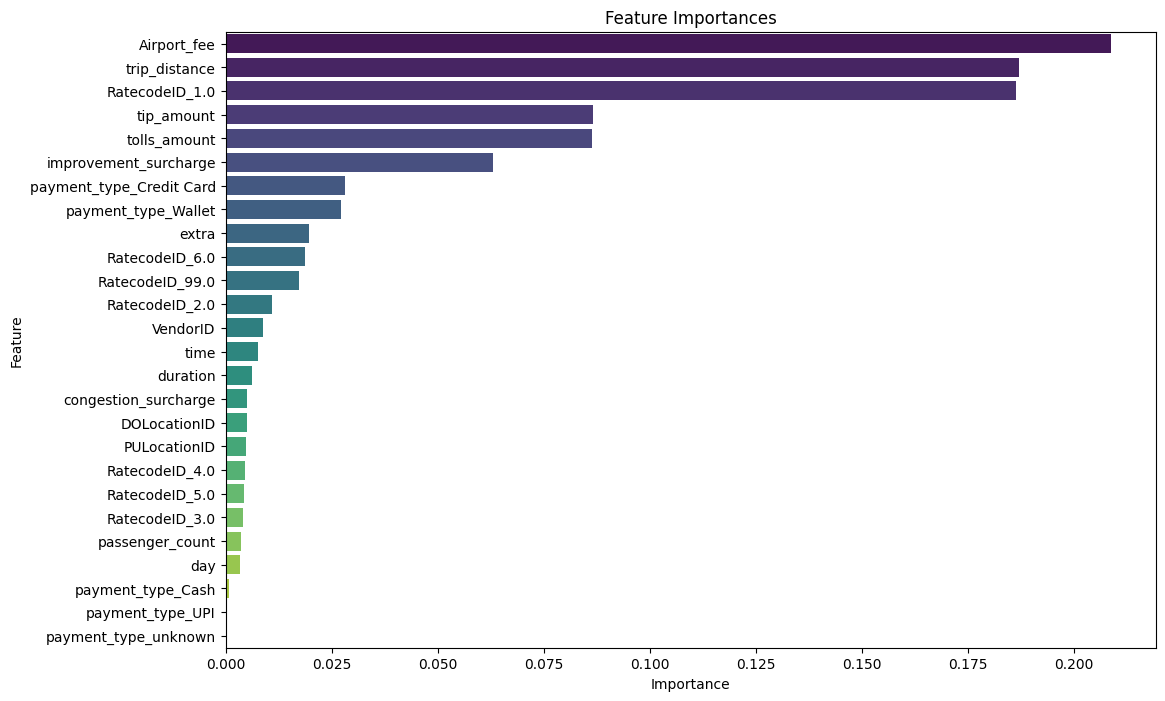

In [336]:
feature_importance = final_model1.feature_importances_

feature_imp = pd.DataFrame({'Feature': final_model1.feature_names_in_, 'Importance': feature_importance})

feature_imp = feature_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')
plt.title('Feature Importances')
plt.show()

**So all the my hypothesis on RateCodeID, looks to be correct**. As we can clearly see, in the feature importance section, they turned out to be one of the most important features.

In [338]:
train['Airport_fee'].unique()

array([ 0.  ,  1.75, -1.75])

**Why Airport_fee turned out to be such an important feature?**
   
***To, answer that question, we need to look carefully at its values.
Only 3 unique values, basically it is getting treated as a categorical variable. Either airport_fee is present(1.75) or not present(0) or its negative(-1.75) (basically predicting negative total_amount)***

*Near the airports everything is very   costly, which can directly contribute in effecting our total_amount. If Airport_fee is present total_amount will be higher than usual.*

**Conclusions from my model.**

1) **trip_distance and tip_amount turned out to be very important as it should be.**

2) **RateCodeID** turned out to be **very important**, *even after dividing it from 1 feature to 7 different features, still its subfeatures shows high importance.*

3) **passenger_count is not that important according to feature importance , which is interesting**.
   Looks like **taxi types, distance, extra charges and duration** are much more important, which is 
   understandable.

In [339]:
answer= pd.DataFrame(columns=['ID','total_amount'])
answer['ID']= [i for i in range(1, len(predictions)+1)]
answer['total_amount']=predictions
answer.to_csv('submission.csv', index=False)

I believe there is a still room for improvements as 2 people are still ahead.

**Possible improvements:**

**1) Combining/ removing unimportant features.**

**2) Hypertuning my model properly even more, though it requires high compute power.**

**3) Maybe using CatBoostRegressor as my model. Although I am not sure whether it is allowed.**

**Reason ,why CatBoostRegressor might perform very well.**

**2 features very important features (Pickup and Dropoff LocationID) were not used properly by our models. Location IDs are not anything close to (Longitude/Latitude).**

*In my dataset they were more likely to be categorical features rather than a quantitative value. For reference I am provinding this link (https://shorturl.at/oDG12).*

*From here, what I found is LocationID's of 2 locations very close to each other can have huge difference in their LocationIDs, means treating LocationIDs as categorical feature is the way to go. And CatBoost is specifically designed to deal with categorical variables.*